In [2]:
import re
import matplotlib.pyplot as plt

# enable extensions if this magic doesn't work
%matplotlib widget

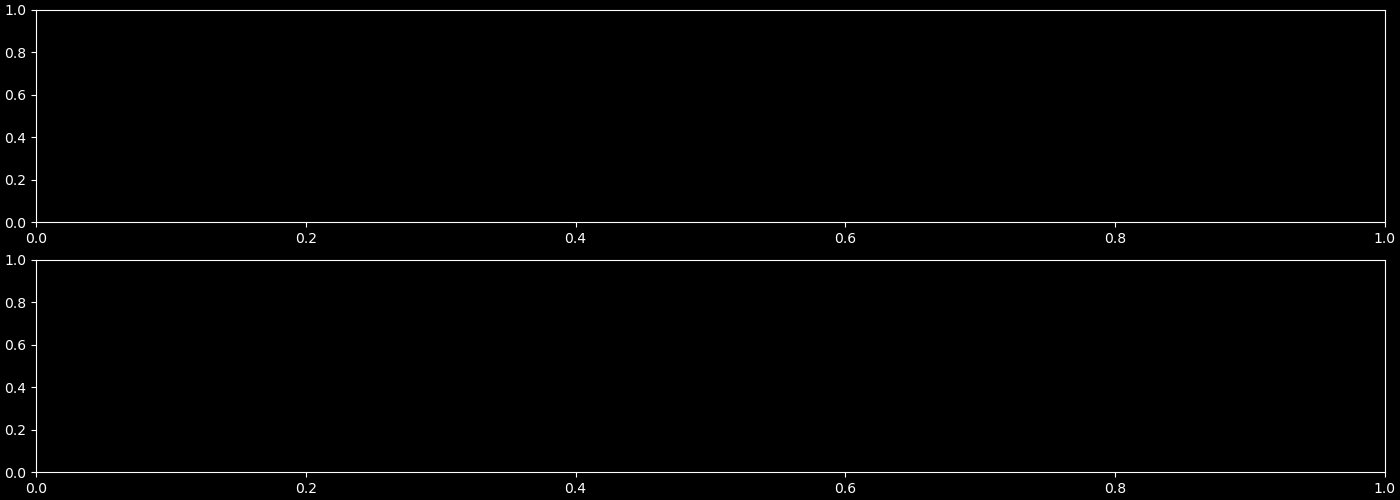

In [4]:
# This cell must be manually run and
# the chart must populate before
# attempting to run the next cell
plt.style.use('dark_background')
fig, ax = plt.subplots(2, 1, figsize=(14, 5), layout='constrained')

In [5]:
i = 1
index = []
times = []
drops = []
# this will run for a very long time
# you will probably want to interrupt the kernal
while i < 100000:
    # send packet to server and store response
    r = !ping -c 1 google.com
    r = r[1]
    
    # add response values to history
    # including dropped requests
    if not r:
        index.append(i)
        times.append(0)
        drops.append(1)
    else:  
        index.append(i)
        r = re.match('.*time=(\d*\.?\d*).*', r)
        r = r.group(1)
        r = float(r)
        times.append(r)
        drops.append(0)
    
    # trim history and increment index
    if i > 1200:
        index.pop(0)
        times.pop(0)
        drops.pop(0)
    i += 1
    
    # draw plot
    ax[0].cla()
    ax[1].cla()
    ax[0].plot(index, times)
    ax[1].plot(index, drops)
    fig.canvas.draw()